# BanditPAM (Simple Demo)

<img src='http://ai.stanford.edu/blog/assets/img/posts/2021-12-17-banditpam/feature.png' width='250'>


In [11]:
from banditpam import KMedoids
from sklearn.cluster import KMeans        # for comparison

import numpy as np
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# Generate data from a Gaussian Mixture Model with the given means:
np.random.seed(0)
n_per_cluster = 20
means = np.array([[0,0], [-5,5], [5,5]])
X = np.vstack([np.random.randn(n_per_cluster, 2) + mu for mu in means])

In [38]:
X.shape

(60, 2)

In [35]:
# Fit the data with KMeans (sklearn)
kmean = KMeans(n_clusters=3)
kmean.fit(X, 'L2')
kmean.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [36]:
# Fit the data with BanditPAM:
kmed = KMedoids(n_medoids=3, algorithm="BanditPAM")
kmed.fit(X, 'L2')
kmed.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=uint64)

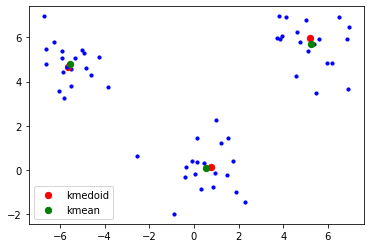

In [37]:
# Visualize the data and the medoids:
for p_idx, point in enumerate(X):
    if p_idx in map(int, kmed.medoids):
        plt.scatter(X[p_idx, 0], X[p_idx, 1], color='red', s = 40, label='kmedoid')
    else:
        plt.scatter(X[p_idx, 0], X[p_idx, 1], color='blue', s = 10)

# Visualize the kmeans cluster centers        
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], color='green', s = 40, label='kmean')

# prevent duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()